In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fandango Rating analysis
---

In [406]:
fndg_rating = pd.read_csv('fandango_scrape.csv') #ratings of the fandango platform

In [407]:
fndg_rating.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [408]:
fndg_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    510 non-null    object 
 1   STARS   510 non-null    float64
 2   RATING  510 non-null    float64
 3   VOTES   510 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 16.1+ KB


### The relationship between the popularity of the film and its rating

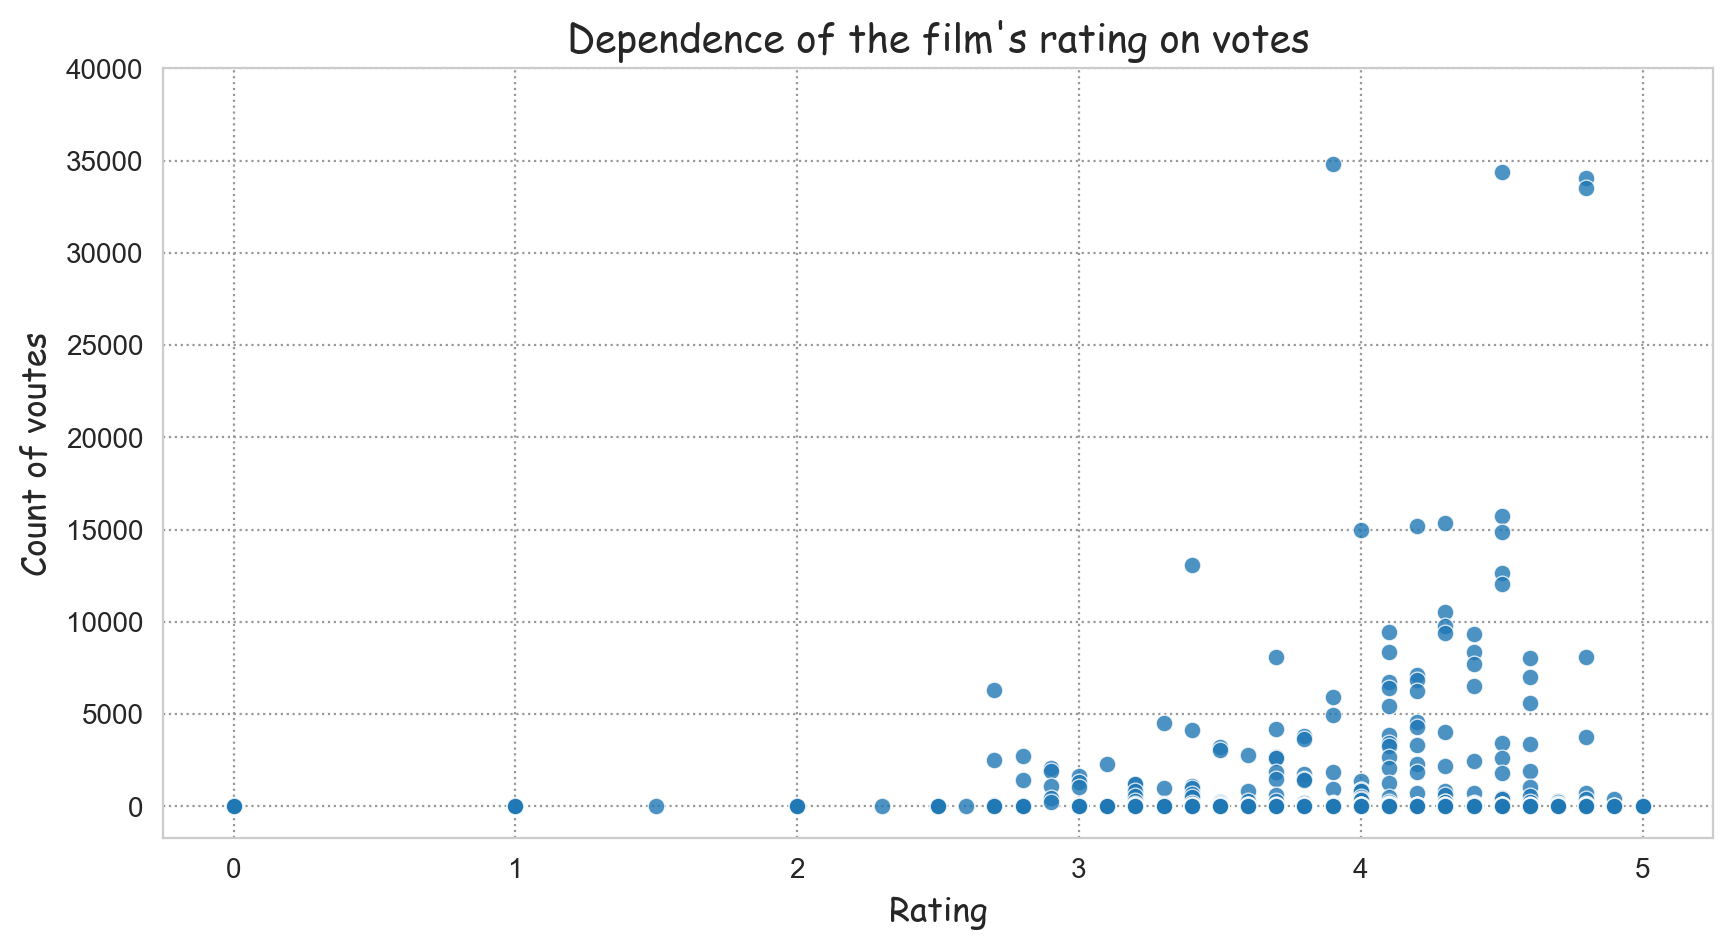

In [459]:
plt.figure(figsize=(10,5), dpi=200)
sns.set_style(style='whitegrid', 
              rc={"grid.color": "0.6", "grid.linestyle": ":"})

sns.scatterplot(data=fndg_rating, 
                x='RATING', 
                y='VOTES', 
                alpha=0.8)
plt.xlabel(xlabel='Rating', 
           fontdict={'size':12, 'family':'cursive'})
plt.ylabel(ylabel='Count of voutes', 
           fontdict={'size':12, 'family':'cursive'})
plt.ylim(plt.ylim()[0], 40000)
plt.title(label="Dependence of the film's rating on votes",  
          fontdict={'size':14, 'family':'cursive'});

### Correlation between fandango ratings

In [410]:
#correlation
fndg_rating_corr = fandango_scores.corr(numeric_only=True)
fndg_rating_corr

,STARS,RATING,VOTES,STARS_DIFFERENCE
STARS,1.000000,0.994870,0.165774,0.466693
RATING,0.994870,1.000000,0.165147,0.374827
VOTES,0.165774,0.165147,1.000000,0.075410
STARS_DIFFERENCE,0.466693,0.374827,0.075410,1.000000


### Let's create a new column with years of movie releases

In [411]:
fndg_rating['YEAR'] = fndg_rating.FILM.apply(lambda filmname: filmname.split()[-1].strip('()'))
fndg_rating

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
505,Valiyavan (2015),0.0,0.0,0,2015
506,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
507,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
508,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [412]:
fndg_rating.YEAR.value_counts() #We see that there are films whose year is specified as 1. Remove the outliers

YEAR
2015    478
2014     23
1         7
2016      1
1964      1
Name: count, dtype: int64

In [380]:
#Cleared movie years data
film_years = np.delete(fandango_scores.YEAR.unique(), np.where(fandango_scores.YEAR.unique() == '1'))
film_years

array(['2015', '2014', '2016', '1964'], dtype=object)

 ### let's build a graph with the count of films released in a certain year

C:\Users\Булат\AppData\Local\Temp\ipykernel_9544\1831290042.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fndg_rating[fndg_rating['YEAR'].isin(film_years)], x='YEAR',


(0.0, 500.0)

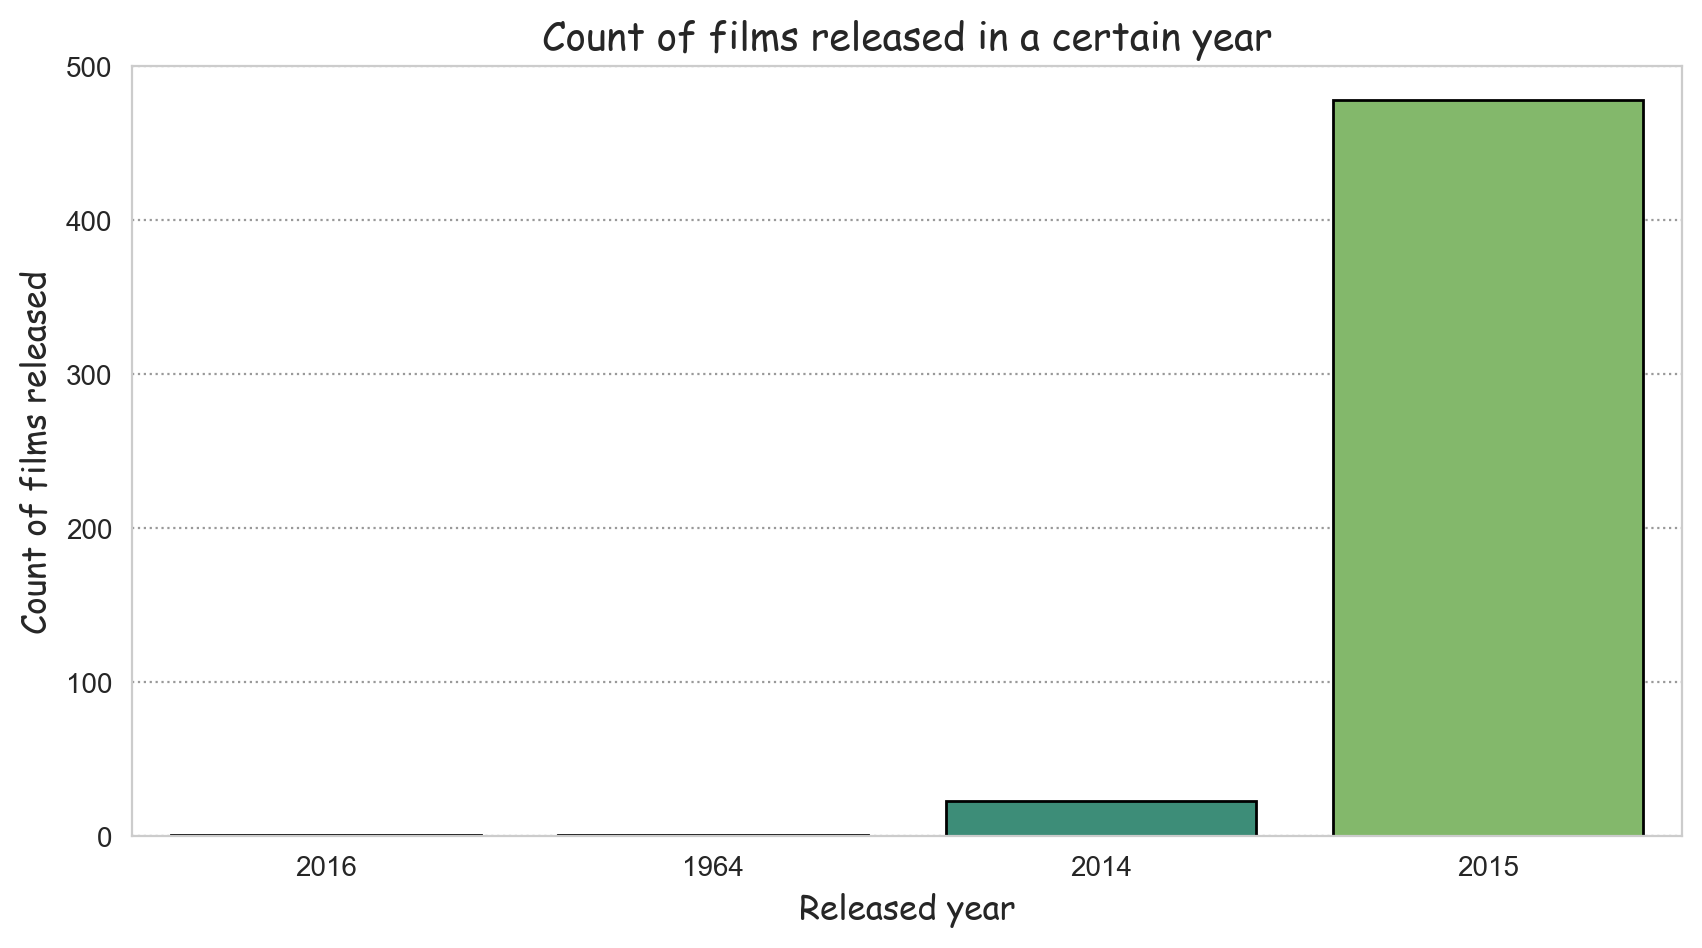

In [495]:
plt.figure(figsize=(10,5), dpi=200)

sns.countplot(data=fndg_rating[fndg_rating['YEAR'].isin(film_years)], x='YEAR', 
              saturation=0.6, 
              edgecolor='black', 
              lw=1,
              palette='viridis',
              order = fndg_rating[fndg_rating['YEAR'].isin(film_years)].YEAR.value_counts(ascending=True).index);

plt.xlabel(xlabel='Released year', 
           fontdict={'size':12, 'family':'cursive'})
plt.ylabel(ylabel='Count of films released', 
           fontdict={'size':12, 'family':'cursive'})
plt.title(label='Count of films released in a certain year', 
          fontdict={'size':14, 'family':'cursive'})

plt.ylim(plt.ylim()[0], 500)


### let's see which films received the most votes

In [414]:
fndg_rating.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


### let's see which films received the zeros votes

In [416]:
fndng_no_votes = fndg_rating[fndg_rating.VOTES == 0]
fndng_no_votes.shape[0] #films withot votes

73

### Let's create a DataFrame with only those films that have votes (votes)

In [417]:
fndg_voted = fandango_scores[fandango_scores.VOTES != 0]
fndg_voted.VOTES.min()

1

### Create a KDE plot graph that displays the distribution of displayed ratings (STARS) and true ratings based on user votes (RATING).

Text(0.5, 1.0, 'Сomparison of the actual rating with the exposed one')

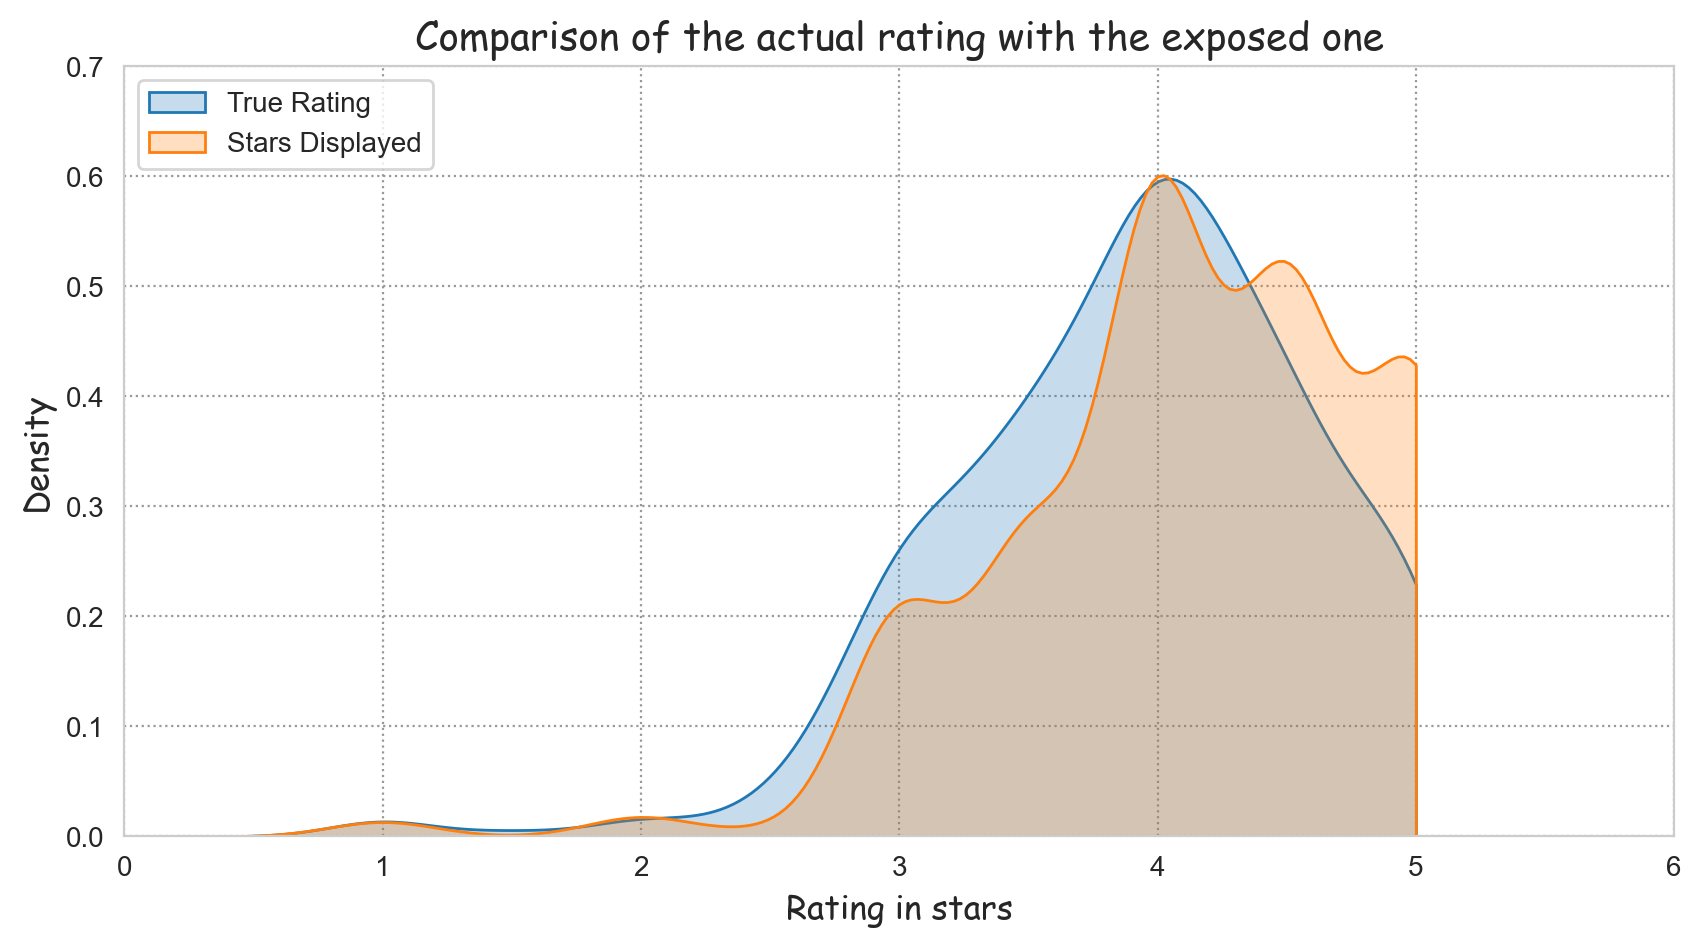

In [493]:
plt.figure(figsize=(10,5), dpi=200)

sns.kdeplot(data=fndg_voted, 
            x='RATING', 
            fill=True,
            clip=[0,5],
            label='True Rating')
sns.kdeplot(data=fndg_voted, 
            x='STARS', 
            fill=True,
            clip=[0,5],
            label="Stars Displayed")

plt.legend(loc='upper left')
plt.xlim(0.0, 6)
plt.ylim(0.0, 0.7)
plt.xlabel(xlabel='Rating in stars',
           fontdict={'size':12, 'family':'cursive'})
plt.ylabel(ylabel='Density',
           fontdict={'size':12, 'family':'cursive'})
plt.title(label='Сomparison of the actual rating with the exposed one',
          fontdict={'size':14, 'family':'cursive'})

### Let's calculate this difference numerically; Create a new column in which we save the difference between the STARS and RATING columns using the usual STARS-RATING subtraction, and also round to one decimal digit after the decimal point.

In [402]:
fndg_voted['STARS_DIFFERENCE'] = np.round(abs(fndg_voted.STARS - fndg_voted.RATING),1)

In [419]:
fndg_voted

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFFERENCE
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
432,That Sugar Film (2015),5.0,5.0,1,2015,0.0
433,The Intern (2015),5.0,5.0,1,2015,0.0
434,The Park Bench (2015),5.0,5.0,1,2015,0.0
435,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


C:\Users\Булат\AppData\Local\Temp\ipykernel_9544\1334525299.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fndg_voted,


Text(0.5, 1.0, 'Number of discrepancies')

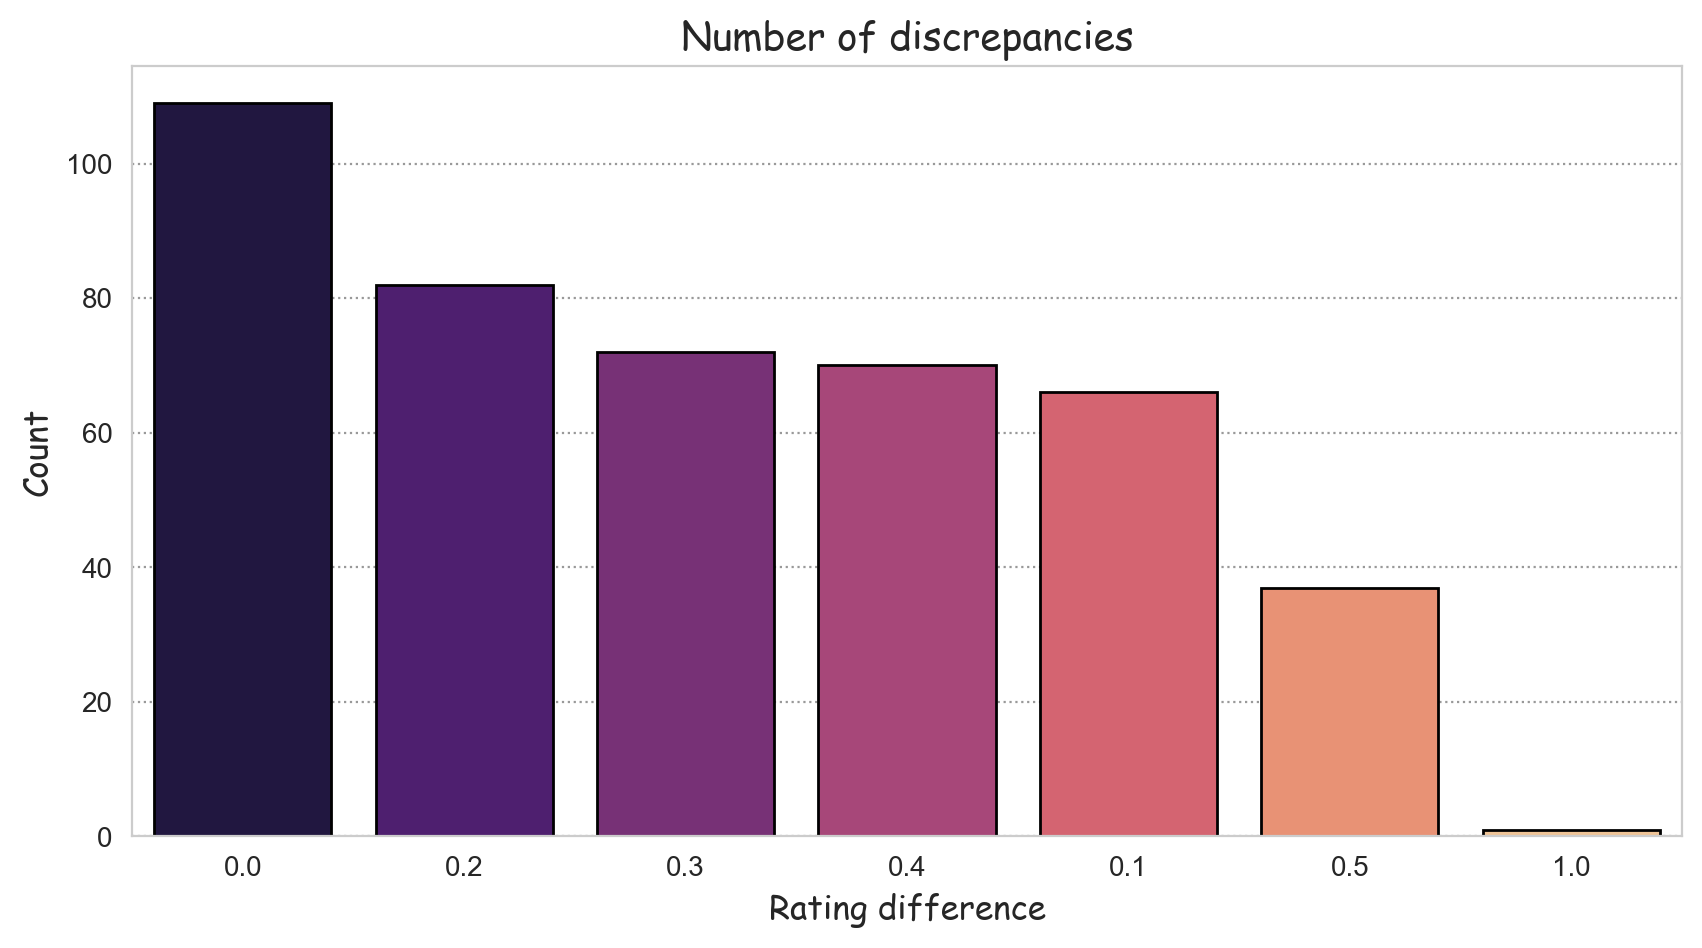

In [492]:
plt.figure(figsize=(10,5), dpi=200)

sns.countplot(data=fndg_voted,
              x='STARS_DIFFERENCE',
              palette='magma',
              ec='black',
              lw=1,
              order=fndg_voted.STARS_DIFFERENCE.value_counts(ascending=False).index)

plt.xlabel(xlabel='Rating difference',
           fontdict={'size':12, 'family':'cursive'})
plt.ylabel(ylabel='Count',
           fontdict={'size':12, 'family':'cursive'})
plt.title(label='Number of discrepancies',
          fontdict={'size':14, 'family':'cursive'})


### In this graph, we can see that one of the films has a 1 star difference between the displayed rating and the true rating! Let's find this movie.

In [432]:
fndg_voted[fndg_voted.STARS_DIFFERENCE == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFFERENCE
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


# Comparison of Fandango ratings with ratings of other companies
---

In [538]:
others_rating = pd.read_csv('all_sites_scores.csv') #ratings of the all platforms

In [539]:
others_rating.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [540]:
others_rating.columns #All existing ratings

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count'],
      dtype='object')

## RottenTomatoes Rating
#### There are two sets of ratings here - ratings published by official critics and user ratings.

### A scatterplot graph depicting for Rotten Tomatoes the relationship between ratings from critics and user ratings.

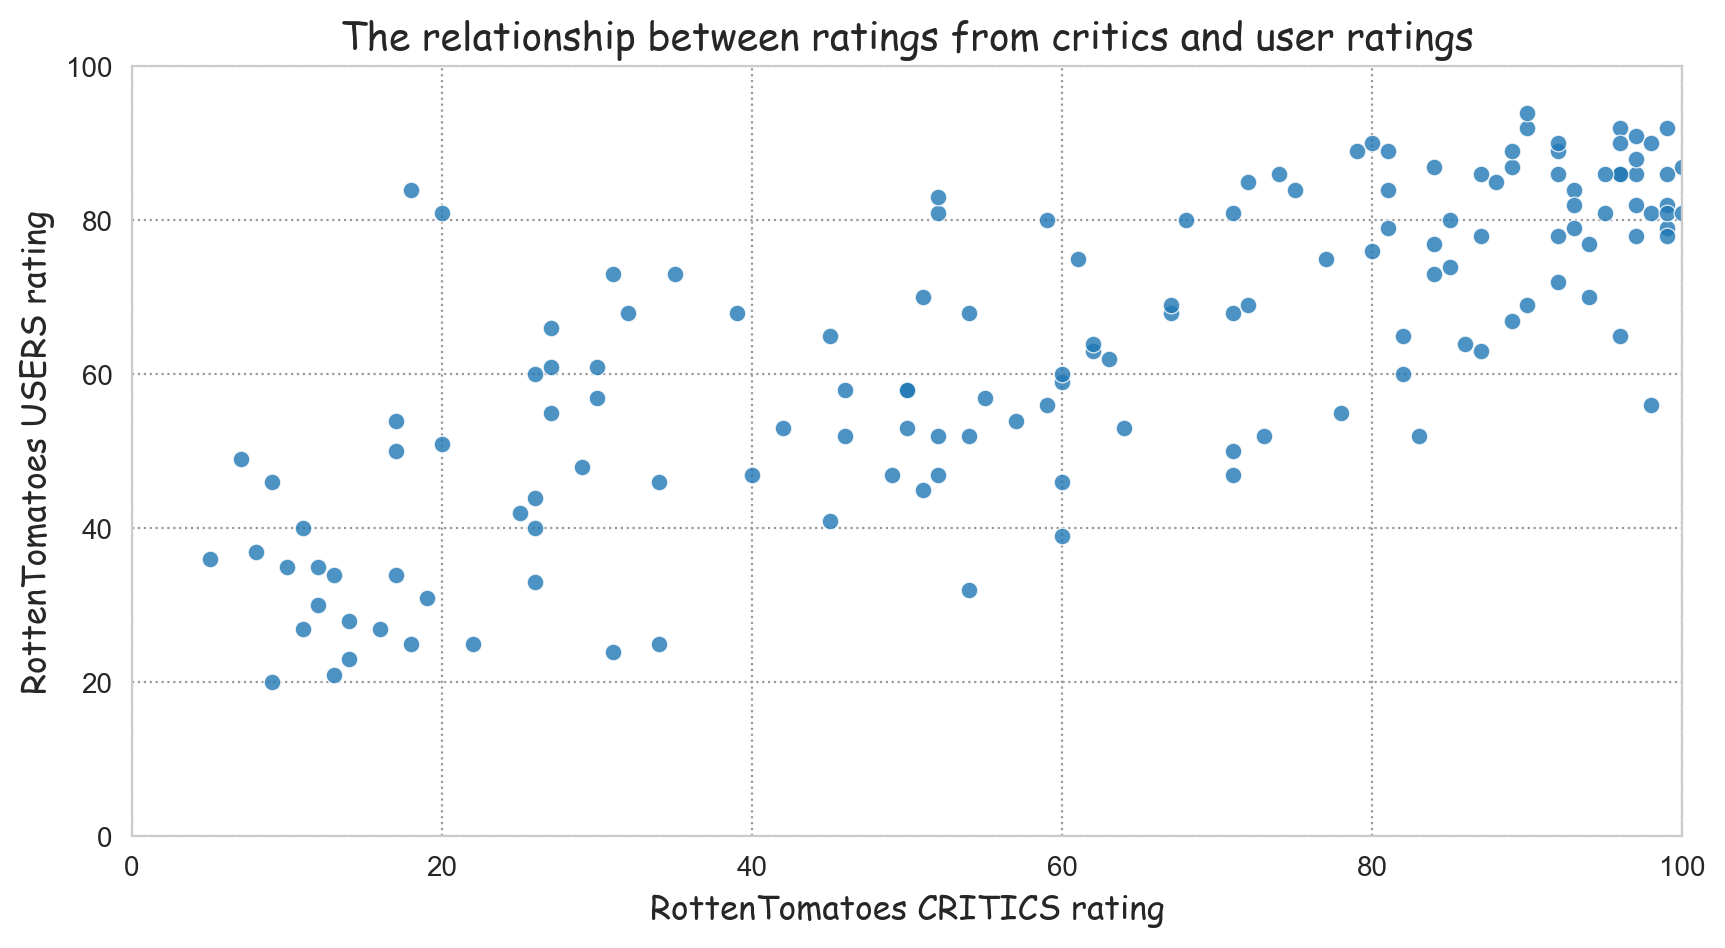

In [541]:
plt.figure(figsize=(10,5), dpi=200)

sns.scatterplot(data=others_rating, 
                x='RottenTomatoes', 
                y='RottenTomatoes_User', 
                alpha=0.8)

plt.xlabel(xlabel='RottenTomatoes CRITICS rating', 
           fontdict={'size':12, 'family':'cursive'})
plt.ylabel(ylabel='RottenTomatoes USERS rating', 
           fontdict={'size':12, 'family':'cursive'})
plt.xlim(0,100)
plt.ylim(0,100)
plt.title(label="The relationship between ratings from critics and user ratings",  
          fontdict={'size':14, 'family':'cursive'});

### Let's create a new column that preserves the difference between the rating from critics and the user rating for Rotten Tomatoes.

In [542]:
others_rating['RT_Rating_Diff'] = others_rating.RottenTomatoes - others_rating.RottenTomatoes_User

In [543]:
others_rating.head() 
#Big positive values - when critics rated the film much higher than users.
#And large negative values - on the contrary, users rated the film much higher than critics.

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Rating_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


### Average absolute difference between ratings from critics and user ratings for Rotten Tomatoes

In [544]:
others_rating.RT_Rating_Diff.apply(abs).mean()

15.095890410958905

### Chart of the distribution of the difference between ratings from critics and user ratings for Rotten Tomatoes

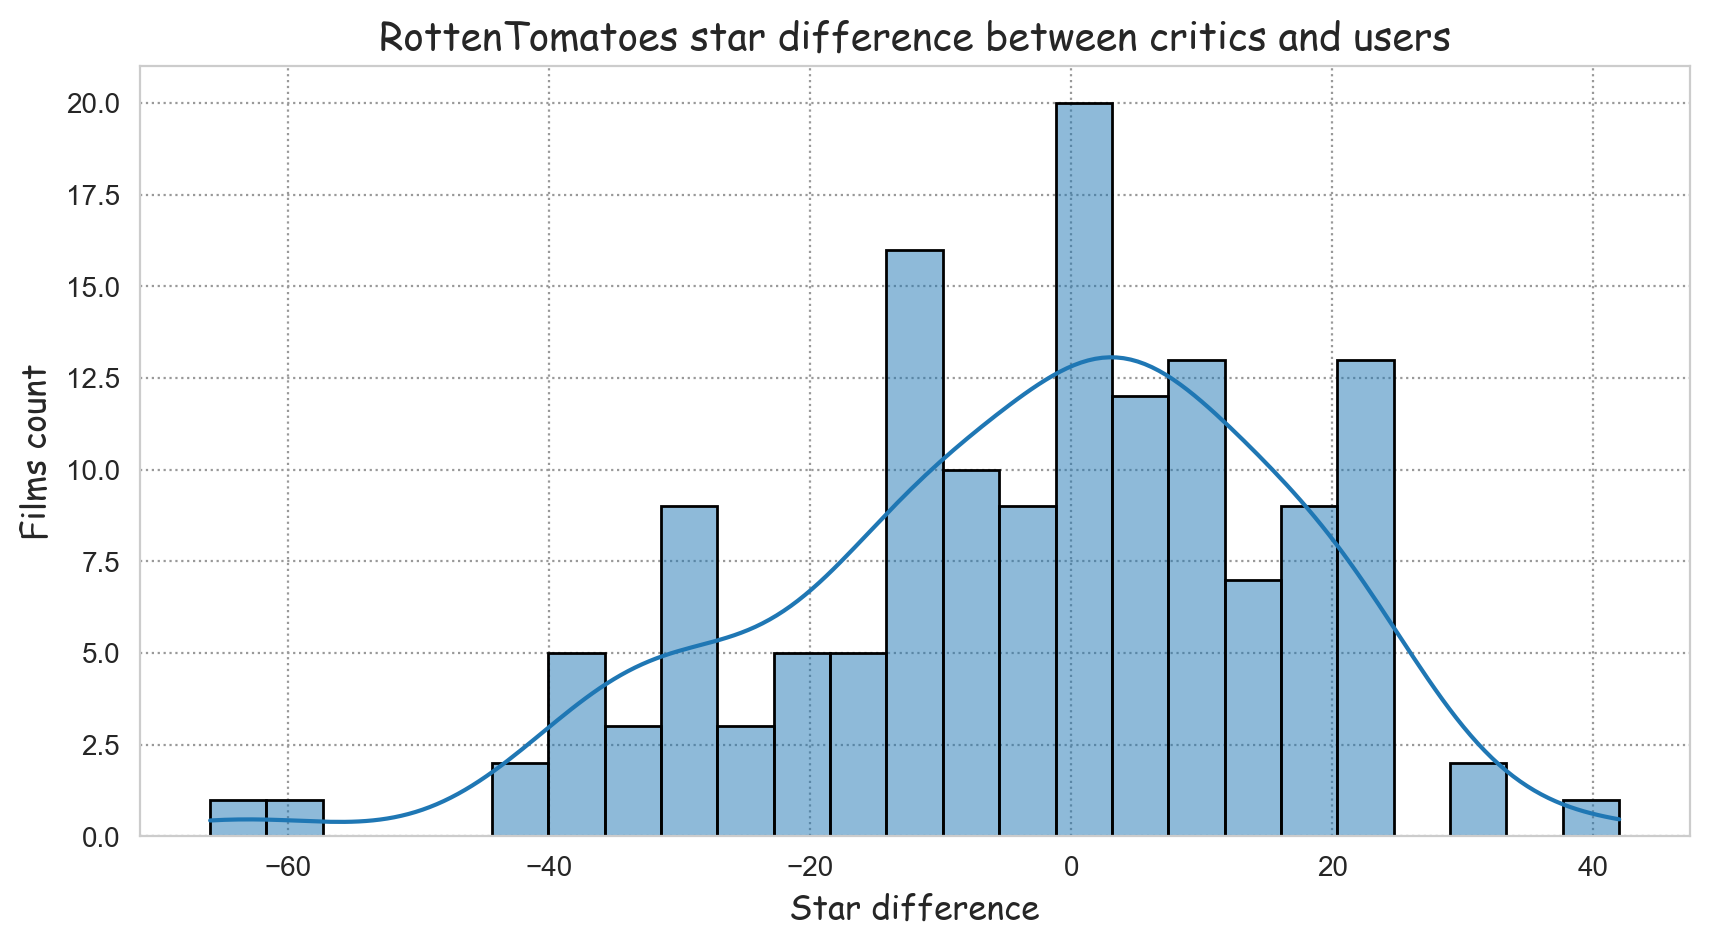

In [545]:
plt.figure(figsize=(10,5), dpi=200)

sns.histplot(data=others_rating, 
             x='RT_Rating_Diff', 
             bins=25,
             kde=True,
             edgecolor='black')

plt.xlabel(xlabel='Star difference', 
           fontdict={'size':12, 'family':'cursive'})
plt.ylabel(ylabel='Films count', 
           fontdict={'size':12, 'family':'cursive'})
plt.title(label="RottenTomatoes star difference between critics and users",  
          fontdict={'size':14, 'family':'cursive'});

### a graph of the distribution of absolute values of the difference between ratings from critics and user ratings for Rotten Tomatoes.

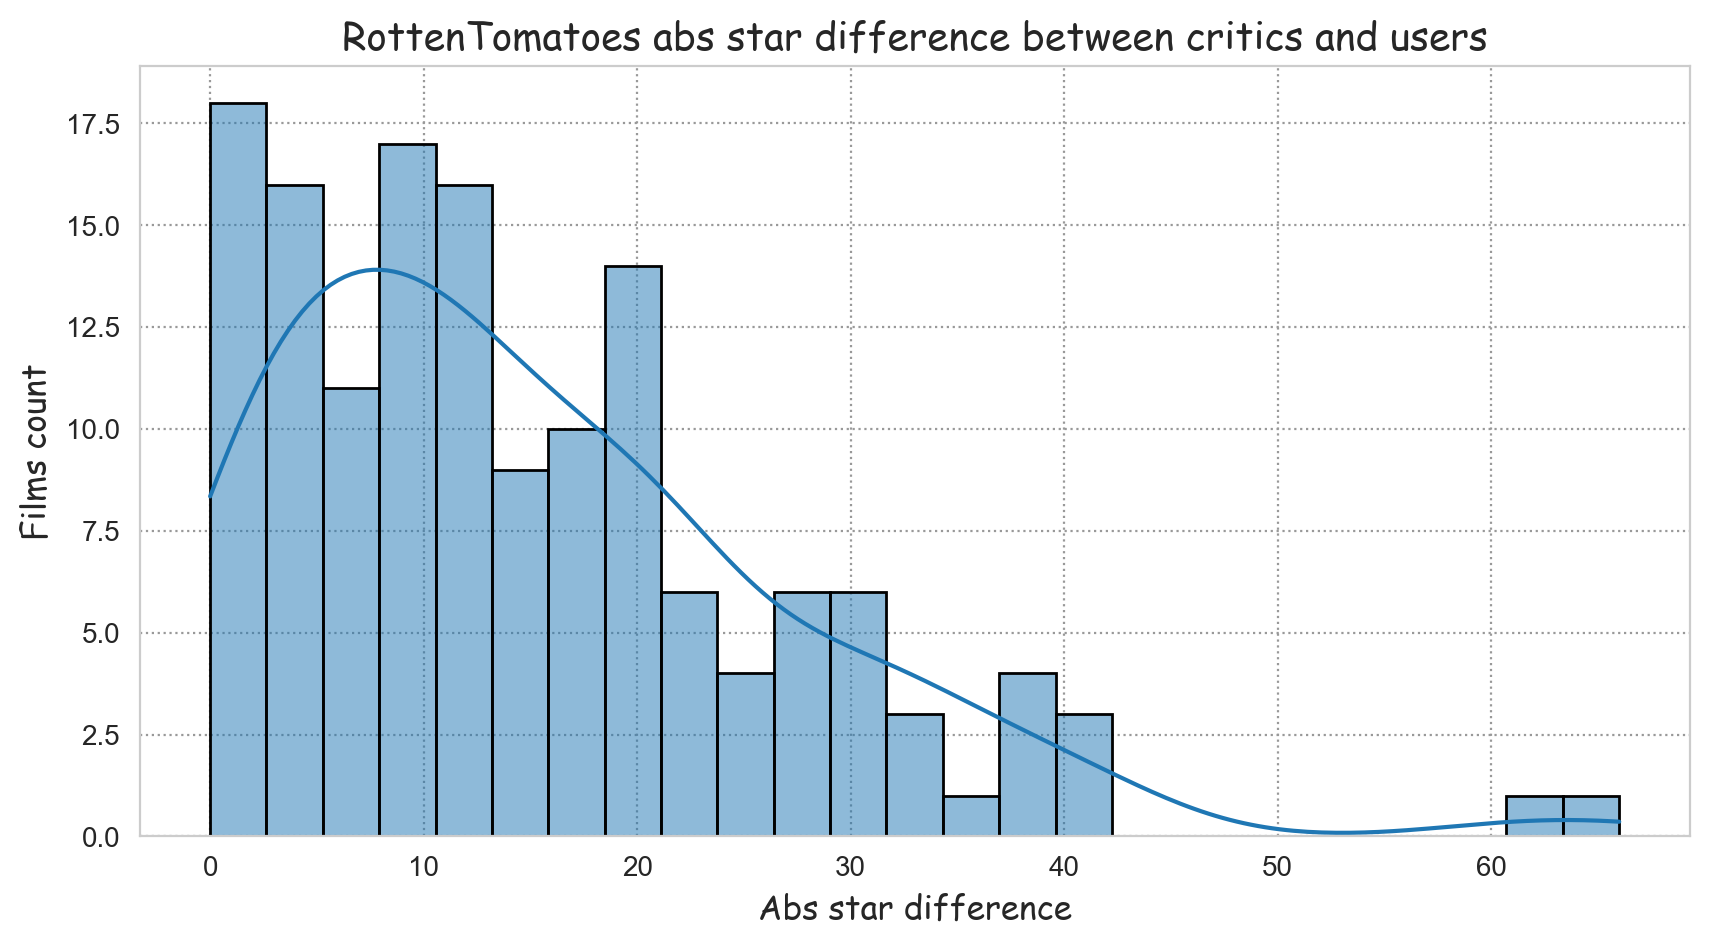

In [546]:
plt.figure(figsize=(10,5), dpi=200)

sns.histplot(data=others_rating.RT_Rating_Diff.apply(abs), 
             bins=25,
             kde=True,
             edgecolor='black')

plt.xlabel(xlabel='Abs star difference', 
           fontdict={'size':12, 'family':'cursive'})
plt.ylabel(ylabel='Films count', 
           fontdict={'size':12, 'family':'cursive'})
plt.title(label="RottenTomatoes abs star difference between critics and users",  
          fontdict={'size':14, 'family':'cursive'});

### Let's find out which films are most different in ratings. First, we will output 5 films with the largest modulo negative rating difference. Since we calculated the rating difference using the Critics Rating - Users Rating formula, large modulo negative values indicate that users on average rated these films much higher than critics.

In [547]:
others_rating.nsmallest(5, 'RT_Rating_Diff')[['FILM', 'RottenTomatoes', 'RottenTomatoes_User']]

,FILM,RottenTomatoes,RottenTomatoes_User
3,Do You Believe? (2015),18,84
85,Little Boy (2015),20,81
105,Hitman: Agent 47 (2015),7,49
134,The Longest Ride (2015),31,73
125,The Wedding Ringer (2015),27,66


### Display the 5 films that, on average, were rated the highest by critics, compared to ratings from users.

In [548]:
others_rating.nlargest(5, 'RT_Rating_Diff')[['FILM', 'RottenTomatoes', 'RottenTomatoes_User']]

,FILM,RottenTomatoes,RottenTomatoes_User
69,Mr. Turner (2014),98,56
112,It Follows (2015),96,65
115,While We're Young (2015),83,52
37,Welcome to Me (2015),71,47
40,I'll See You In My Dreams (2015),94,70


## Metacritic Rating

In [549]:
## A scatterplot chart for comparing Metacritic and Metacritic User ratings.

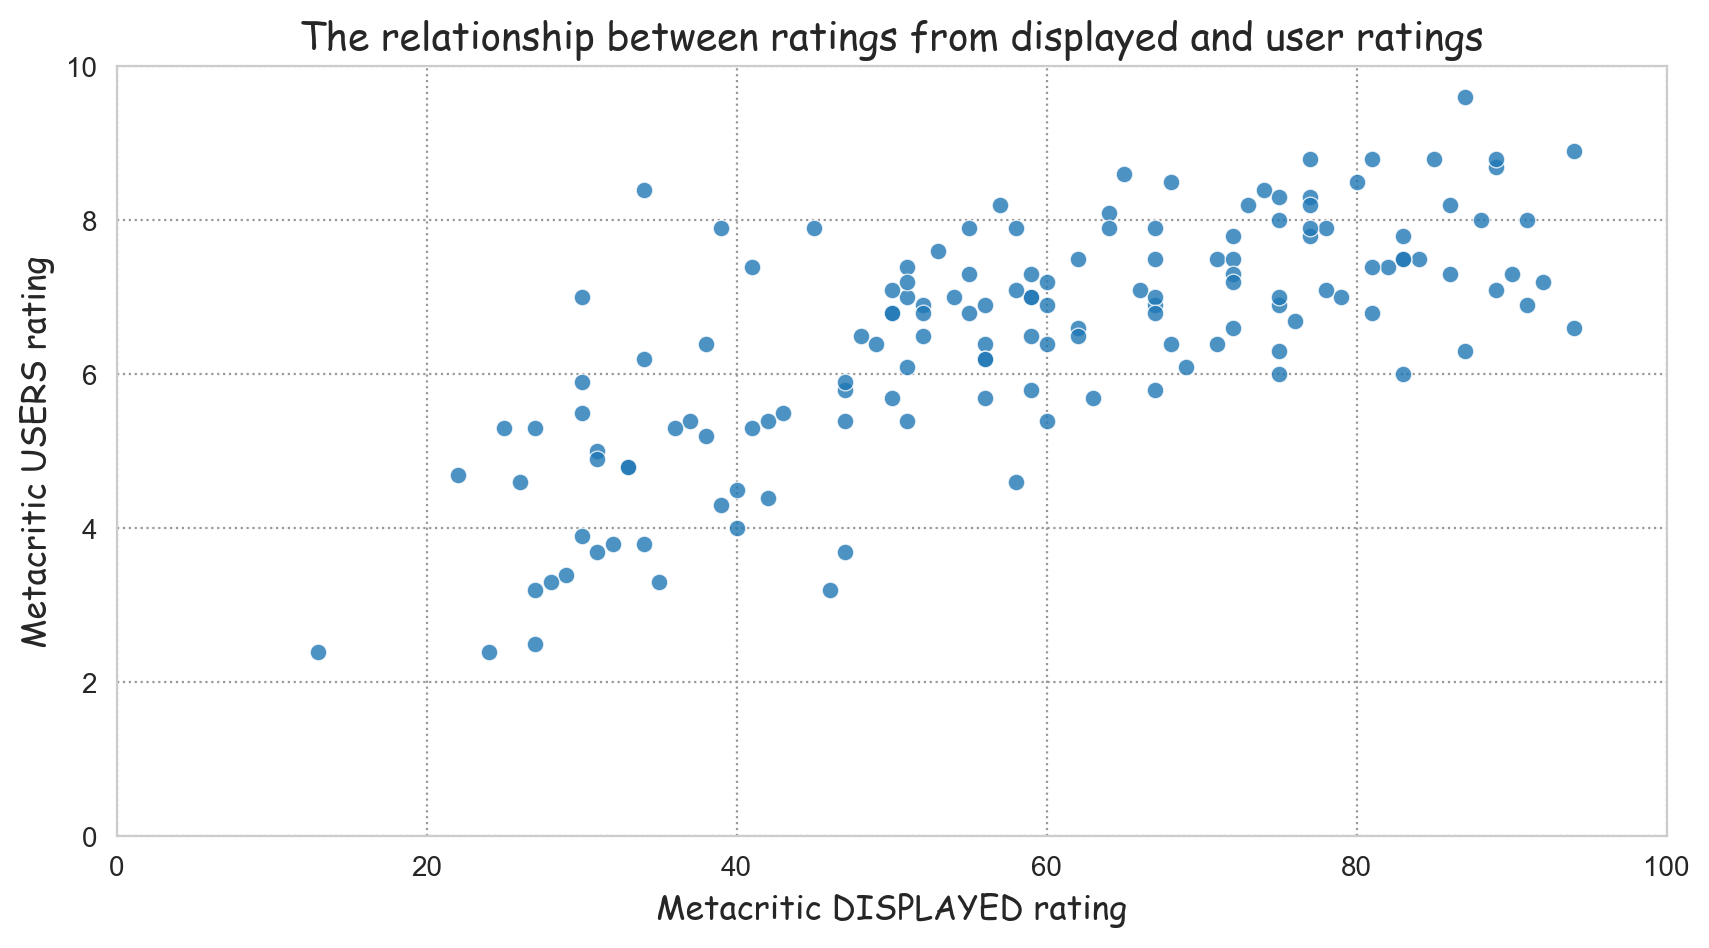

In [550]:
plt.figure(figsize=(10,5), dpi=200)

sns.scatterplot(data=others_rating, 
                x='Metacritic', 
                y='Metacritic_User', 
                alpha=0.8)

plt.xlabel(xlabel='Metacritic DISPLAYED rating', 
           fontdict={'size':12, 'family':'cursive'})
plt.ylabel(ylabel='Metacritic USERS rating', 
           fontdict={'size':12, 'family':'cursive'})
plt.xlim(0,100)
plt.ylim(0,10)
plt.title(label="The relationship between ratings from displayed and user ratings",  
          fontdict={'size':14, 'family':'cursive'});

## IMDb Rating
Note that Metacritic and IMDB show the number of votes. Let's look at the most popular movies.

In [551]:
others_rating.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count', 'RT_Rating_Diff'],
      dtype='object')

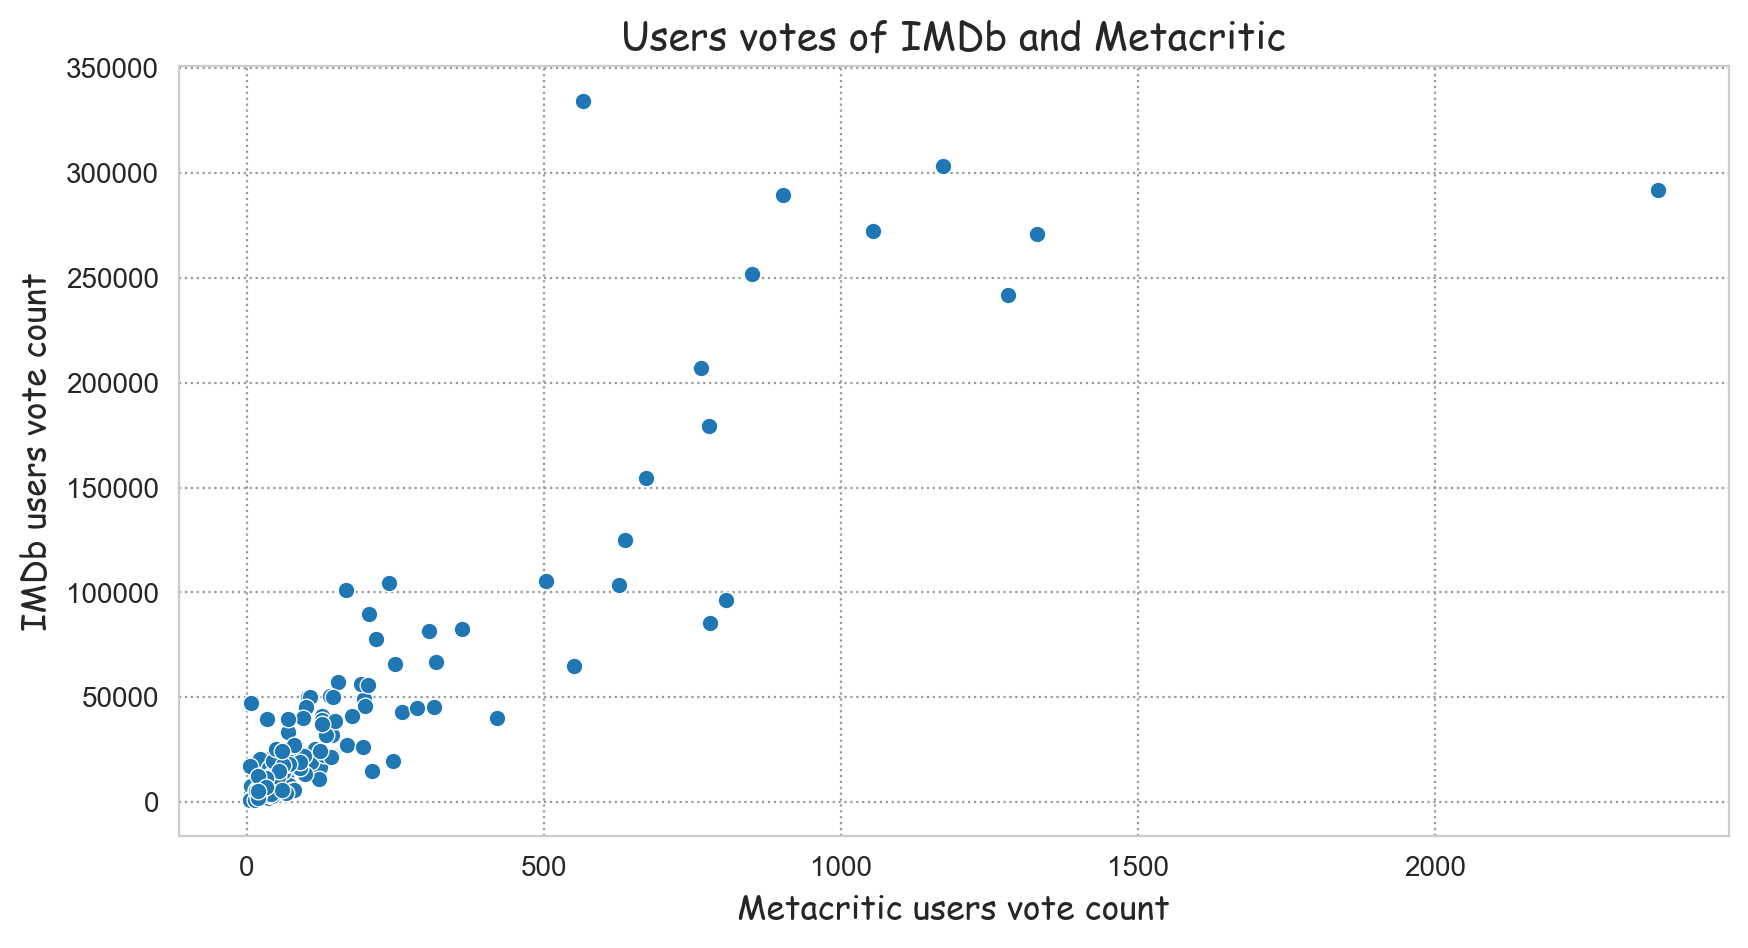

In [552]:
plt.figure(figsize=(10,5), dpi=200)

sns.scatterplot(data=others_rating, 
                x='Metacritic_user_vote_count',
                y='IMDB_user_vote_count')

plt.xlabel(xlabel='Metacritic users vote count', 
           fontdict={'size':12, 'family':'cursive'})
plt.ylabel(ylabel='IMDb users vote count', 
           fontdict={'size':12, 'family':'cursive'})

plt.title(label="Users votes of IMDb and Metacritic",  
          fontdict={'size':14, 'family':'cursive'});

### We see two "outliers" - points that are very different from all other points. One movie received the most votes on IMDB, but only 500 votes on Metacritic. What kind of movie is this?

In [553]:
others_rating.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Rating_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [554]:
### Which movie received the most votes on Metacritic?

In [555]:
others_rating.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Rating_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


# Comparison of Fandango ratings with ratings of other companies
---

### Let's combine the fandango table with the all_sites table. Not every movie in the Fandango table will be found in the all_sites table, because some Fandango movies have very few reviews or no reviews at all. But we want to compare only those movies that are in both tables. Therefore, do an "inner merge" of the two datasets by matching the rows by the FILM column.

In [559]:
all_rating = pd.merge(left=others_rating, right=fndg_rating, on='FILM', how='inner')

### Rotten Tomatoes, Metacritic and IMDB use a different rating scale than the scale from 0 to 5 stars in Fandango. To make comparisons, we need to normalize these values so that they fall within the range from 0 to 5 stars.

In [560]:
all_rating.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Rating_Diff,STARS,RATING,VOTES,YEAR
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,5.0,4.5,14846,2015
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,5.0,4.5,12640,2015
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,5.0,4.5,12055,2015
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,5.0,4.5,1793,2015
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,3.5,3.0,1021,2015


In [564]:
all_rating.columns[1:6] #Raiting which need to converte

Index(['RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB'],
      dtype='object')

In [576]:
rating_norm_names = ['RT_norm', 'RT_Users_norm', 'Metacritic_norm', 'Metacritic_Users_norm', 'IMDB_norm']

In [694]:
for rating, rating_norm_name in zip(all_rating.columns[1:6], rating_norm_names):
    all_rating[rating_norm_name] = np.round(all_rating[rating] / 20, 1)

all_rating['Metacritic_Users_norm'] = np.round(all_rating['Metacritic_User'] / 2, 1)
all_rating['IMDB_norm'] = np.round(all_rating['IMDB'] / 2, 1)

all_rating

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Rating_Diff,STARS,RATING,VOTES,YEAR,RT_norm,RT_Users_norm,Metacritic_norm,Metacritic_Users_norm,IMDB_norm
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,5.0,4.5,14846,2015,3.7,4.3,3.3,3.6,3.9
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,5.0,4.5,12640,2015,4.2,4.0,3.4,3.8,3.6
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,5.0,4.5,12055,2015,4.0,4.5,3.2,4.0,3.9
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,5.0,4.5,1793,2015,0.9,4.2,1.1,2.4,2.7
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,3.5,3.0,1021,2015,0.7,1.4,1.4,1.7,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9,4.0,4.0,1348,2015,4.4,3.9,3.4,4.0,3.7
141,'71 (2015),97,82,83,7.5,7.2,60,24116,15,3.5,3.5,192,2015,4.8,4.1,4.2,3.8,3.6
142,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19,3.5,3.5,118,2014,4.8,3.9,4.4,4.4,3.7
143,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19,3.5,3.5,59,2015,5.0,4.0,4.5,3.6,3.9


In [695]:
all_rating.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count', 'RT_Rating_Diff', 'STARS', 'RATING', 'VOTES',
       'YEAR', 'RT_norm', 'RT_Users_norm', 'Metacritic_norm',
       'Metacritic_Users_norm', 'IMDB_norm'],
      dtype='object')

### Data Frame with the name norm_scores, in which you leave only the normalized ratings. Also leave the STARS and RATING columns from the original fandango table.

In [696]:
all_norm_rating = all_rating[['STARS', 'RATING',
                              'RT_norm', 'RT_Users_norm',
                              'Metacritic_norm','Metacritic_Users_norm', 
                              'IMDB_norm']]

In [697]:
all_norm_rating.head()

,STARS,RATING,RT_norm,RT_Users_norm,Metacritic_norm,Metacritic_Users_norm,IMDB_norm
0,5.0,4.5,3.7,4.3,3.3,3.6,3.9
1,5.0,4.5,4.2,4.0,3.4,3.8,3.6
2,5.0,4.5,4.0,4.5,3.2,4.0,3.9
3,5.0,4.5,0.9,4.2,1.1,2.4,2.7
4,3.5,3.0,0.7,1.4,1.4,1.7,2.6


## And now the moment of truth! Did Fandango really show unreasonably high ratings? We already know that the displayed RATING values were higher than the STARS values. But are the ratings themselves on average higher than those of other companies?

In [698]:
def print_kdeplot(data, x, name=None, ax=None, color=None):
    sns.kdeplot(data=data,
                x=x,
                clip=[0,5],
                label=name,
                ax=ax,
                fill=True,
                color=color)

In [699]:
all_norm_rating.columns

Index(['STARS', 'RATING', 'RT_norm', 'RT_Users_norm', 'Metacritic_norm',
       'Metacritic_Users_norm', 'IMDB_norm'],
      dtype='object')

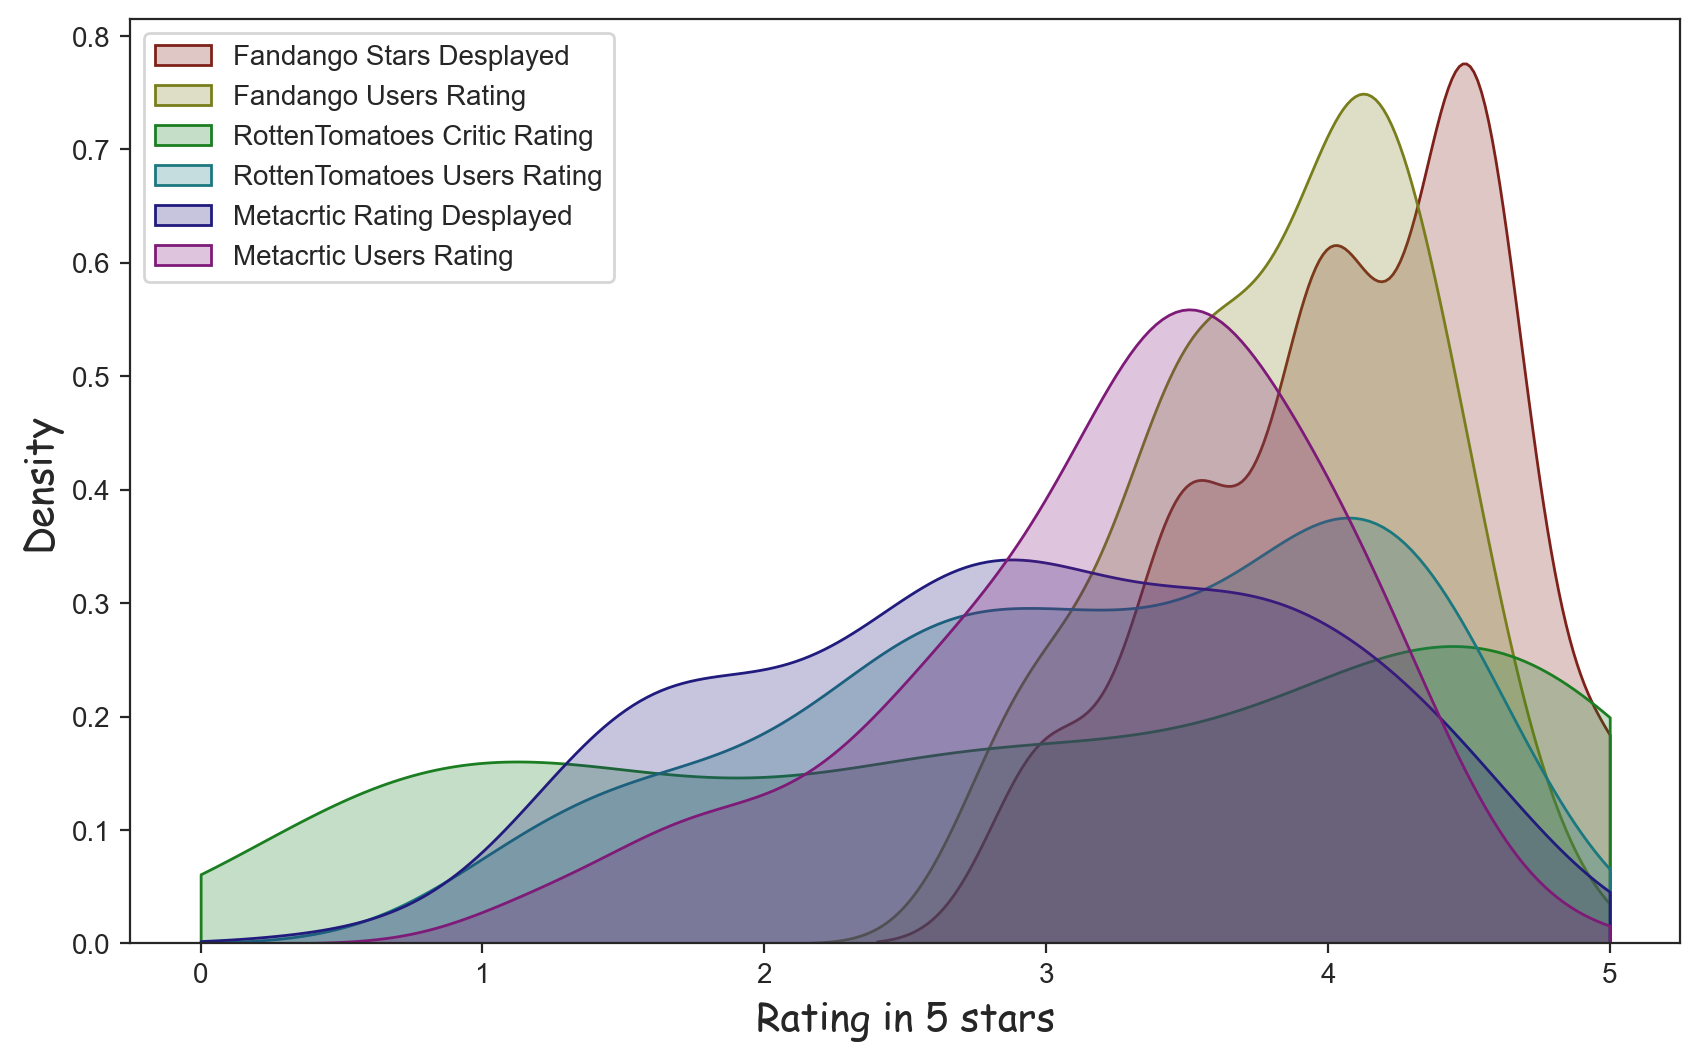

In [700]:
plt.figure(figsize=(10,6), dpi=200)

names=['Fandango Stars Desplayed', 'Fandango Users Rating', 'RottenTomatoes Critic Rating',
       'RottenTomatoes Users Rating', 'Metacrtic Rating Desplayed', 'Metacrtic Users Rating',
       'IMDB Rating']

for x, name, color in zip(all_norm_rating.columns, names, sns.hls_palette(l=.3)):
    print_kdeplot(data=all_norm_rating, x=x, name=name, color=color)

plt.xlabel(xlabel='Rating in 5 stars',
           fontdict={'size':14, 'family':'cursive'})
plt.ylabel(ylabel='Density',
           fontdict={'size':14, 'family':'cursive'})
plt.legend(loc='upper left')


### We immediately see that the ratings of Fandango are very shifted to the right. It is also interesting that RT ratings from critics have a very flat distribution. Let's compare just these two distributions.

Text(0.5, 0.98, 'Comparison of Fandango and RottenTomatoes critics')

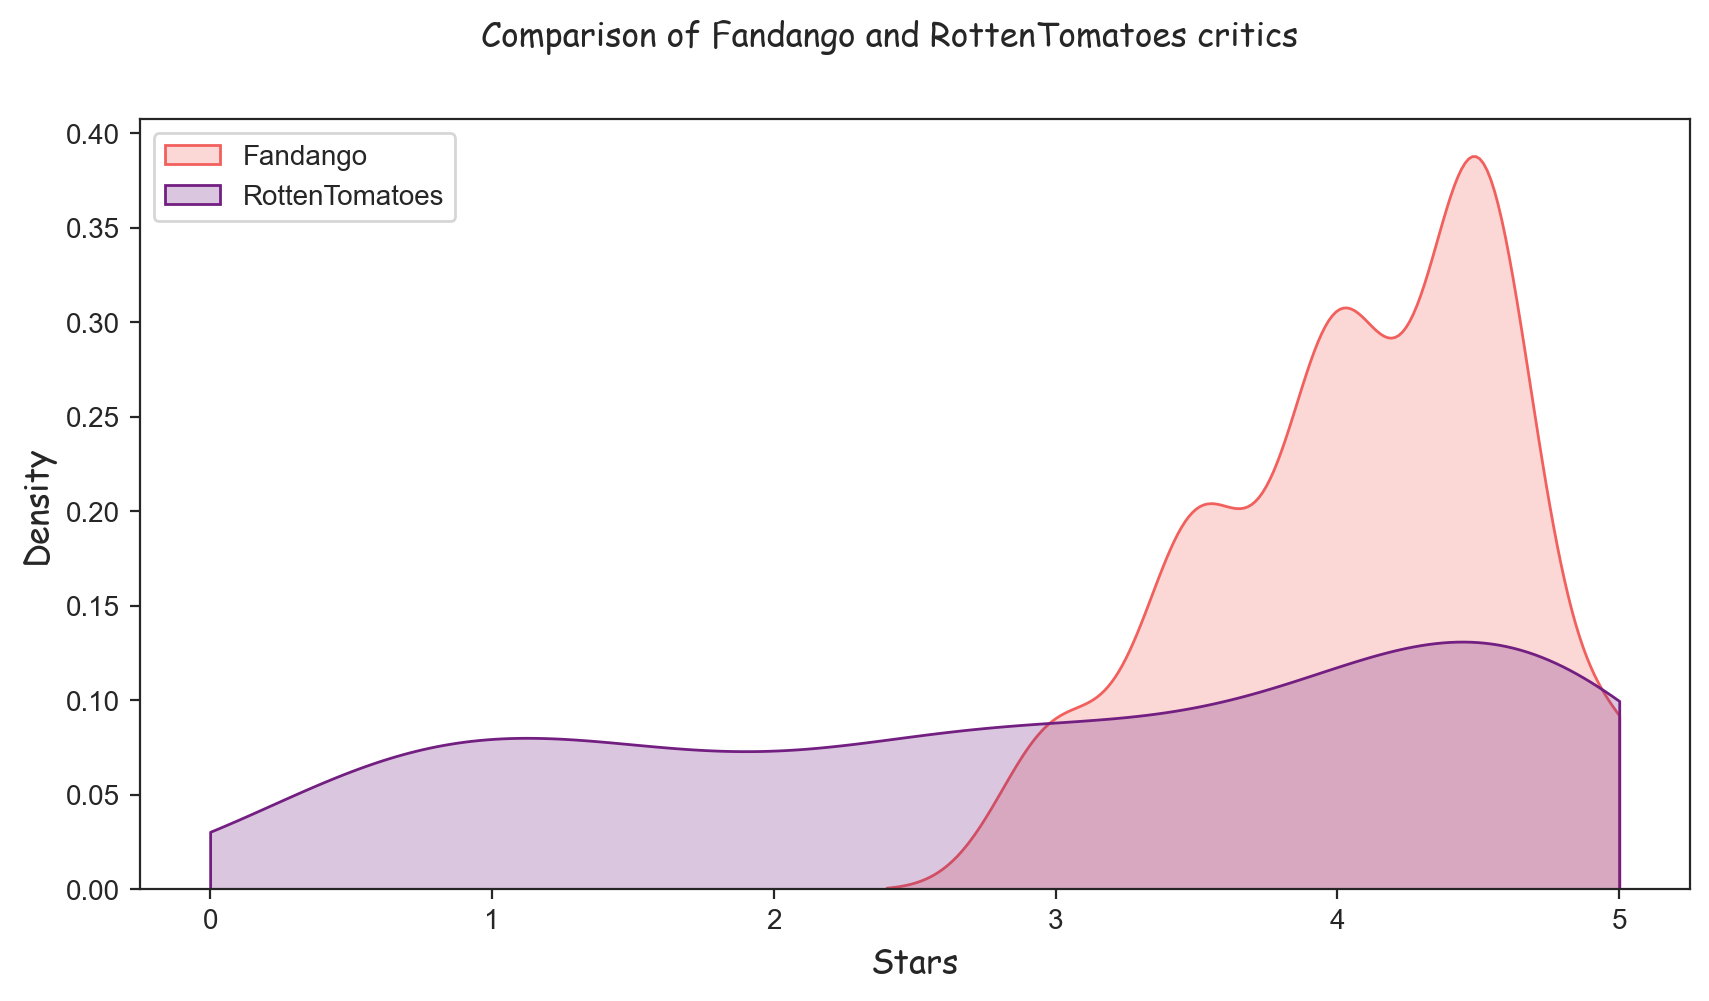

In [701]:
fig, axes = plt.subplots(figsize=(10,5),dpi=200)
sns.kdeplot(data=all_norm_rating[['RT_norm', 'STARS']],
            fill=True,
            palette='magma',
            clip=[0,5])
axes.legend(['Fandango', 'RottenTomatoes'], loc='upper left');
axes.set_xlabel(xlabel='Stars', fontdict={'size':12, 'family':'cursive'})
axes.set_ylabel(ylabel='Density', fontdict={'size':12, 'family':'cursive'})
fig.suptitle('Comparison of Fandango and RottenTomatoes critics', fontdict={'size':14, 'family':'cursive'})

### Let's compare the differences in site ratings

In [702]:
all_rating_users_norm = ['RT_Users_norm', 'Metacritic_Users_norm', 'RATING', 'IMDB_norm'] #users rating columns
all_rating_users_norm

['RT_Users_norm', 'Metacritic_Users_norm', 'RATING', 'IMDB_norm']

In [703]:
all_official_norm = ['RT_norm', 'Metacritic_norm', 'STARS', 'IMDB_norm'] #official rating columns
all_official_norm

['RT_norm', 'Metacritic_norm', 'STARS', 'IMDB_norm']

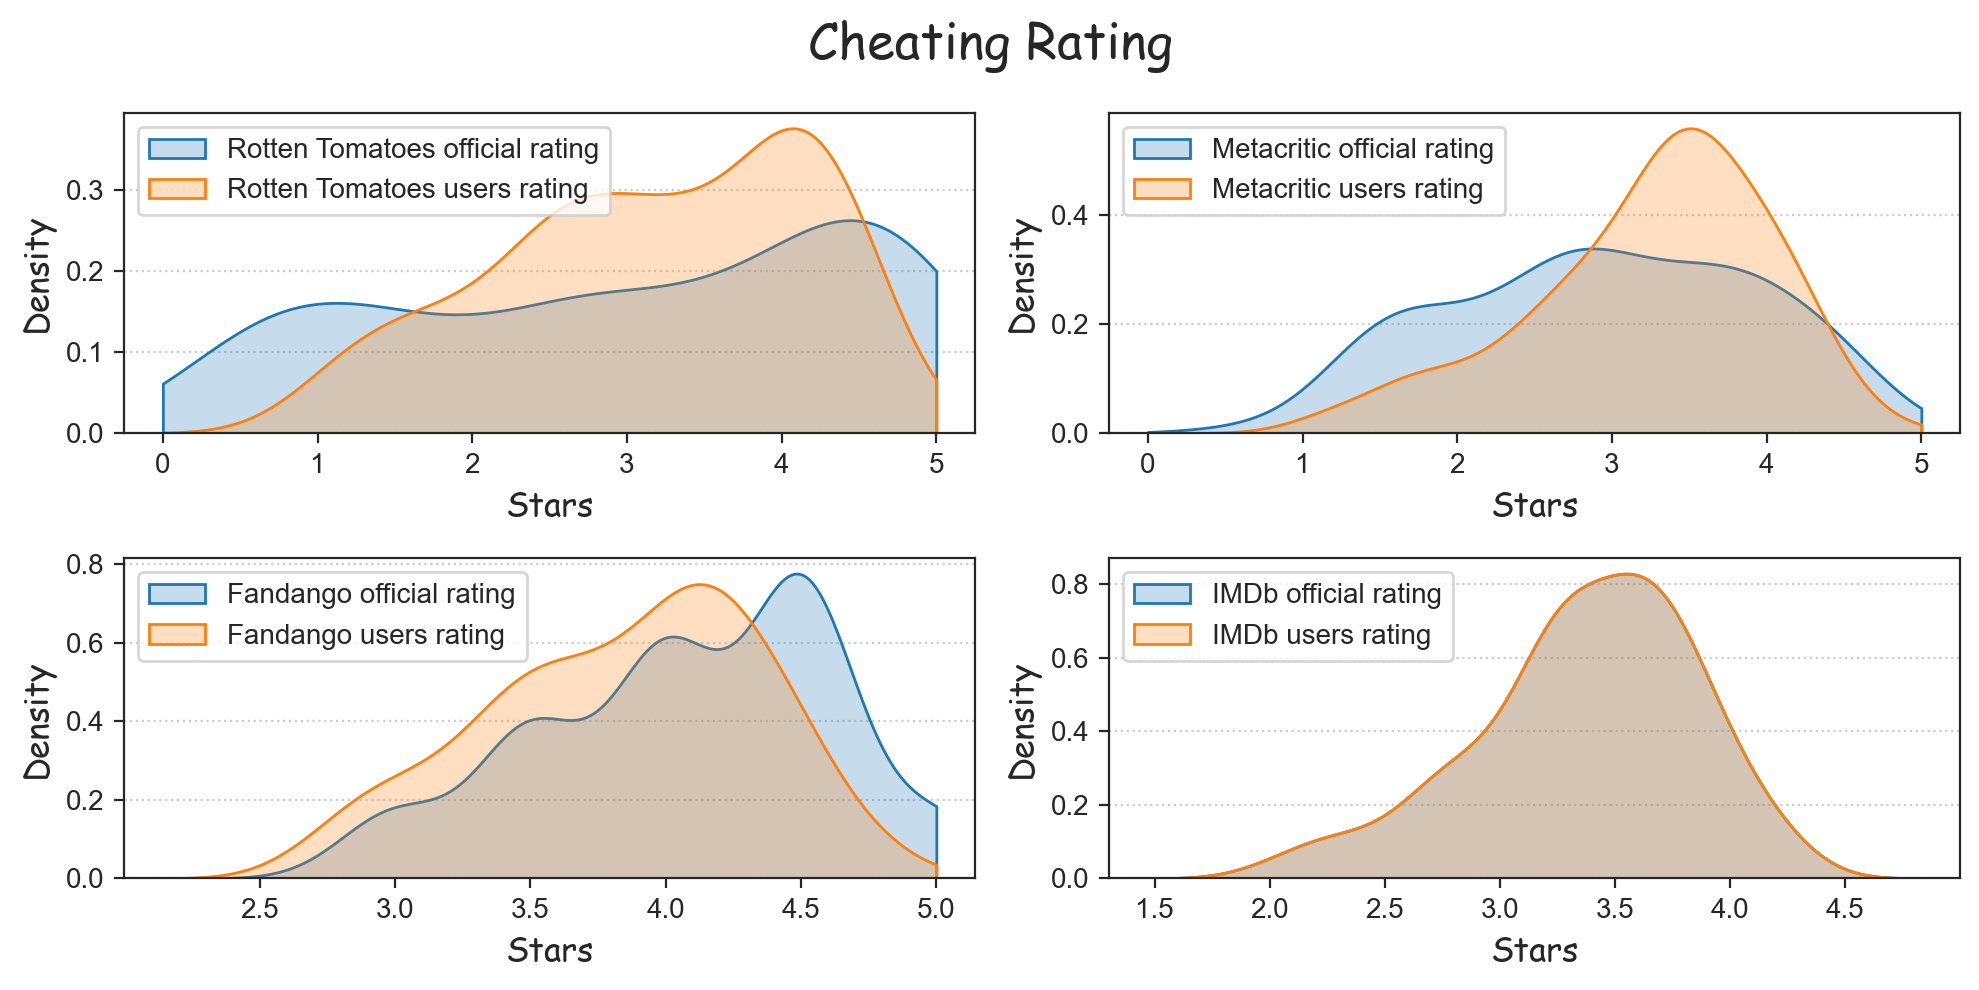

In [704]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,5), dpi=200)

axes = np.ravel(axes)
kde_plots_names=['Rotten Tomatoes', 'Metacritic', 'Fandango', 'IMDb']

for ax, name, x_official, x_users in zip(axes, 
                                        kde_plots_names, 
                                        all_official_norm, 
                                        all_rating_users_norm):
    
    print_kdeplot(data=all_norm_rating, x=x_official, name=name + ' official rating', ax=ax)
    print_kdeplot(data=all_norm_rating, x=x_users, name=name + ' users rating', ax=ax)   
    
    ax.set_xlabel('Stars', fontdict={'size':12, 'family':'cursive'})
    ax.set_ylabel('Density', fontdict={'size':12, 'family':'cursive'})
    ax.legend(loc='upper left')
    ax.grid(visible=True, ls=':', axis='y')

axes = np.reshape(axes, (2,2))

fig.suptitle(t='Cheating Rating', fontsize=18, fontdict={'family':'cursive'})
fig.savefig('Cheating Rating')
fig.tight_layout()



### Let 's show numerically:

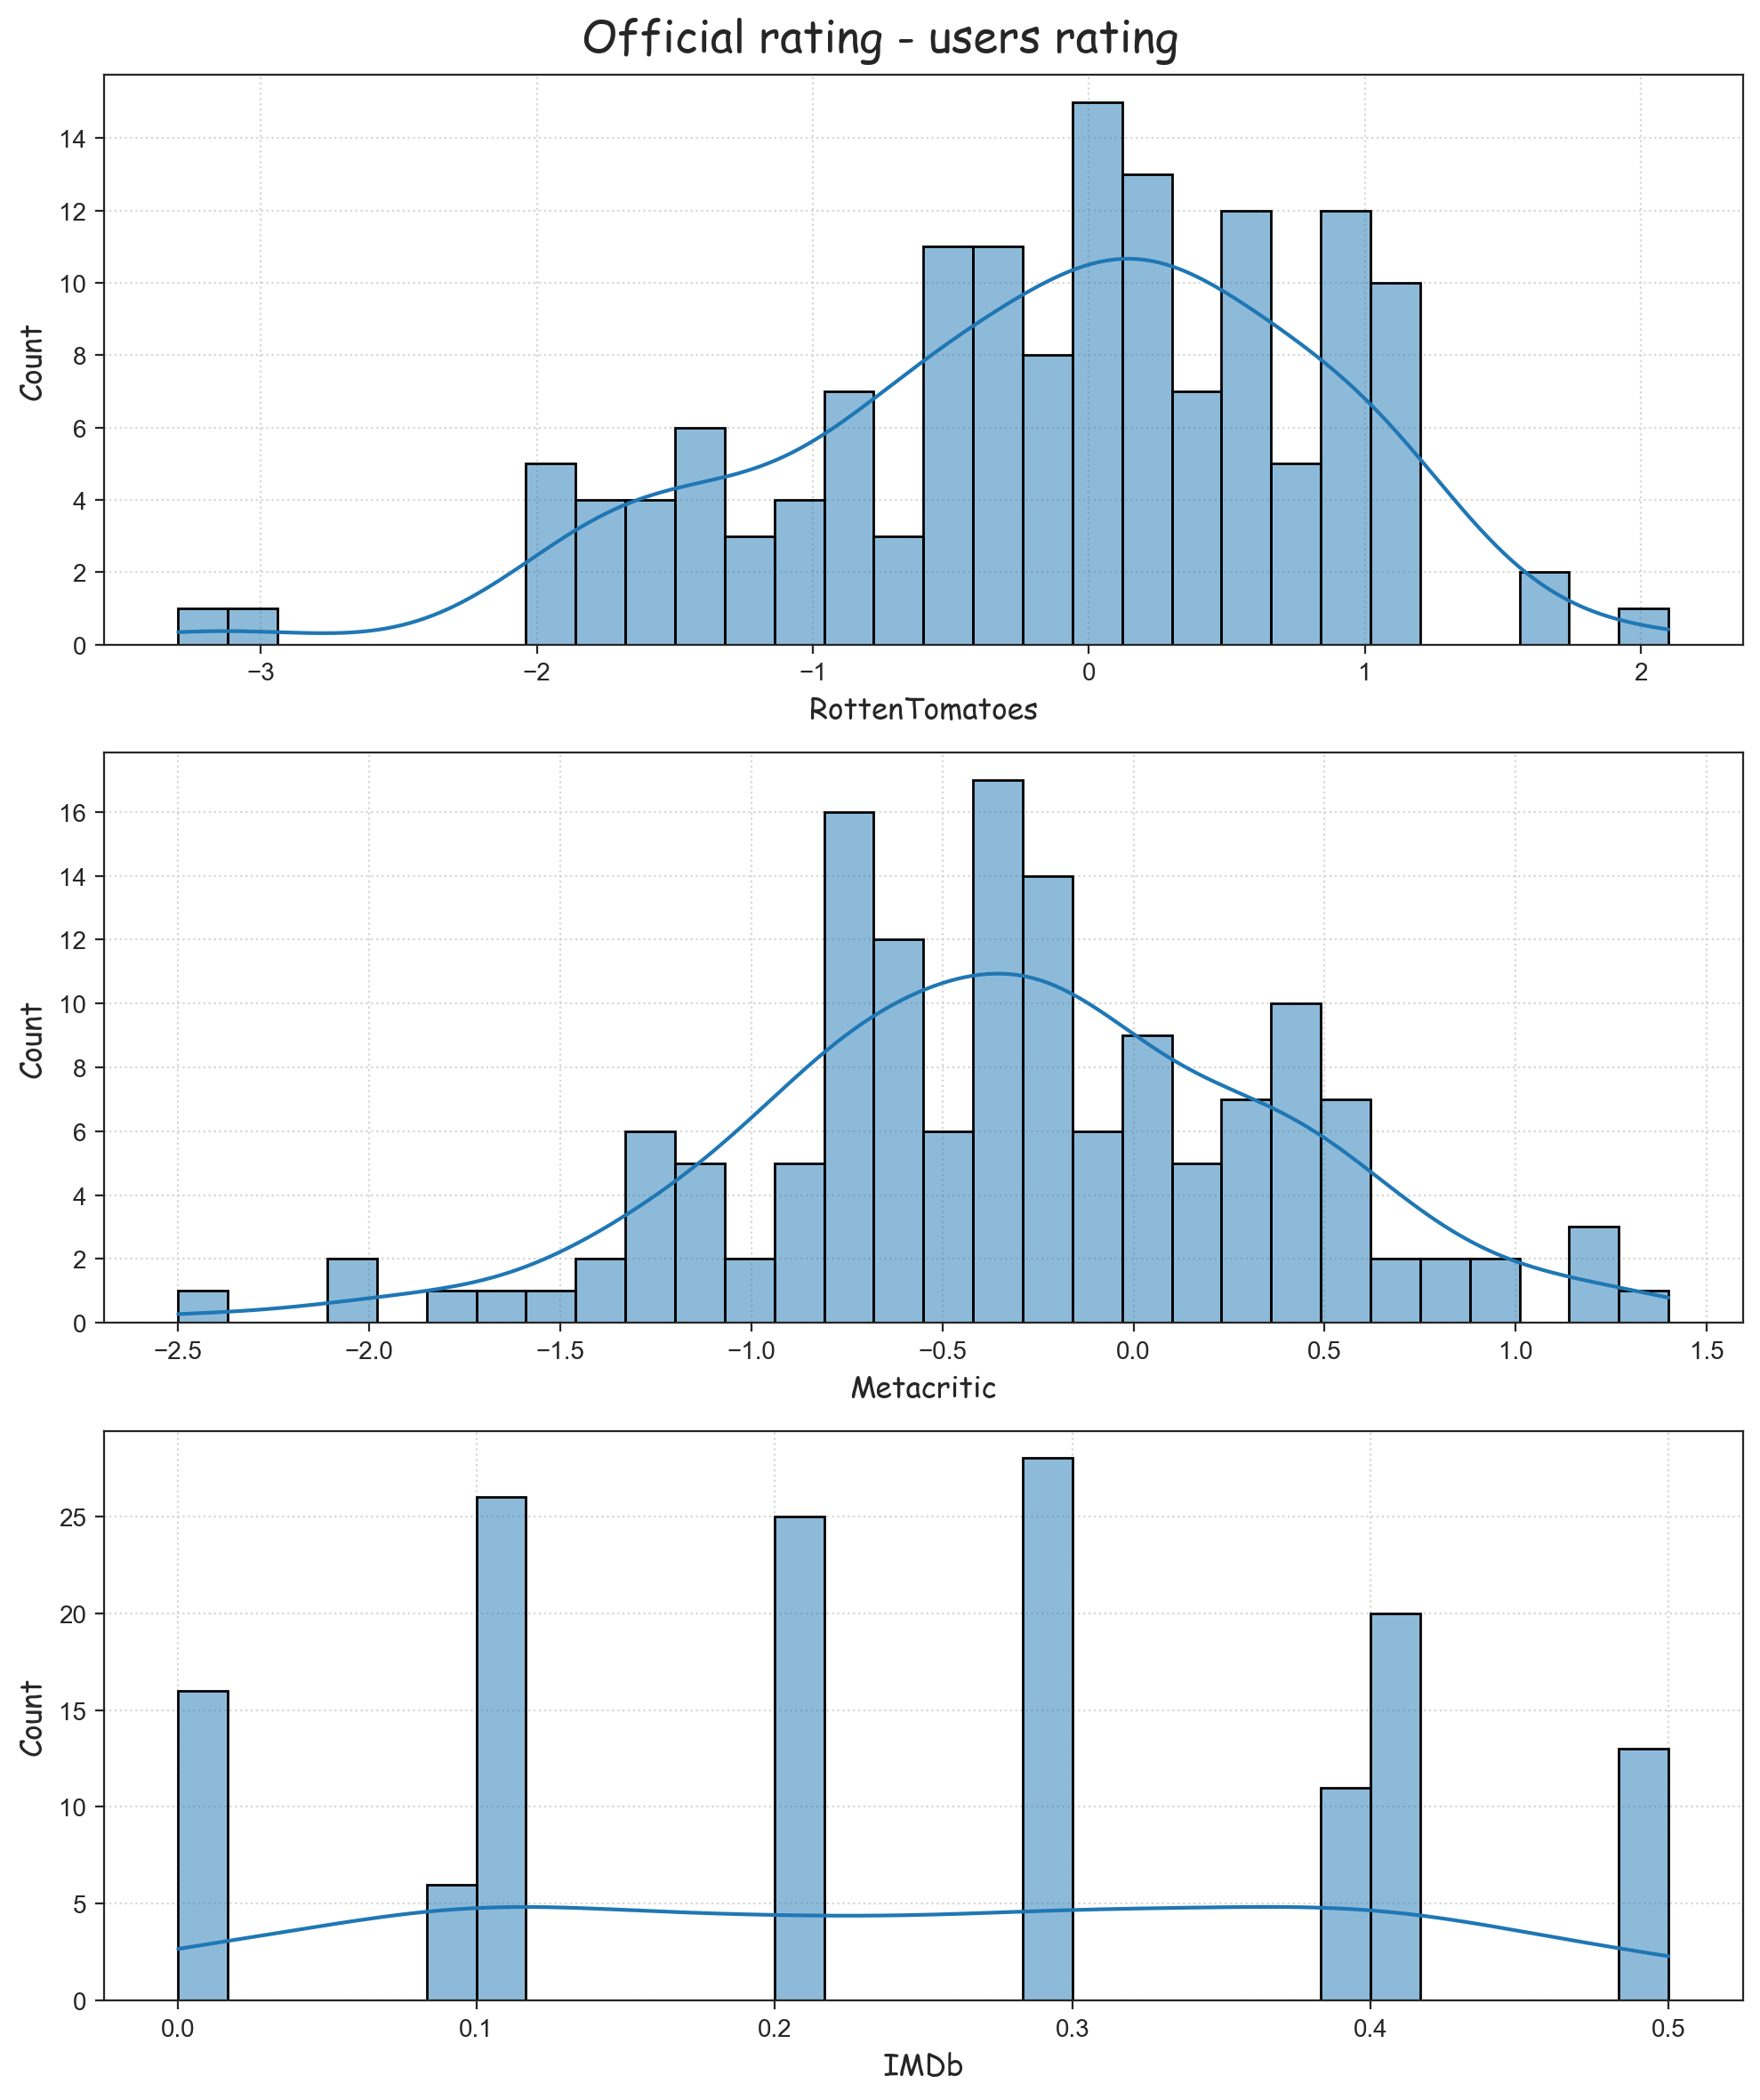

In [707]:
rating_difference_values = (all_norm_rating[all_official_norm].values - all_norm_rating[all_rating_users_norm].values)
rating_difference = pd.DataFrame(data=rating_difference_values, 
                                 columns=['RottenTomatoes', 'Metacritic', 'IMDb', 'Fandango'])

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,12), dpi=200)

for ax, name in zip(axes, rating_difference.columns):
    sns.histplot(data=rating_difference, 
                x=name, 
                ax=ax,
                bins=30,
                kde=True,
                edgecolor='black')
    ax.grid(visible=True, ls=':', alpha=0.8)
    ax.set_xlabel(name, fontdict={'size':12, 'family':'cursive'})
    ax.set_ylabel('Count', fontdict={'size':12, 'family':'cursive'})
fig.suptitle(t='Official rating - users rating', fontsize=18, fontdict={'family':'cursive'})
fig.tight_layout()




### Let's draw a histplot graph comparing all normalized ratings

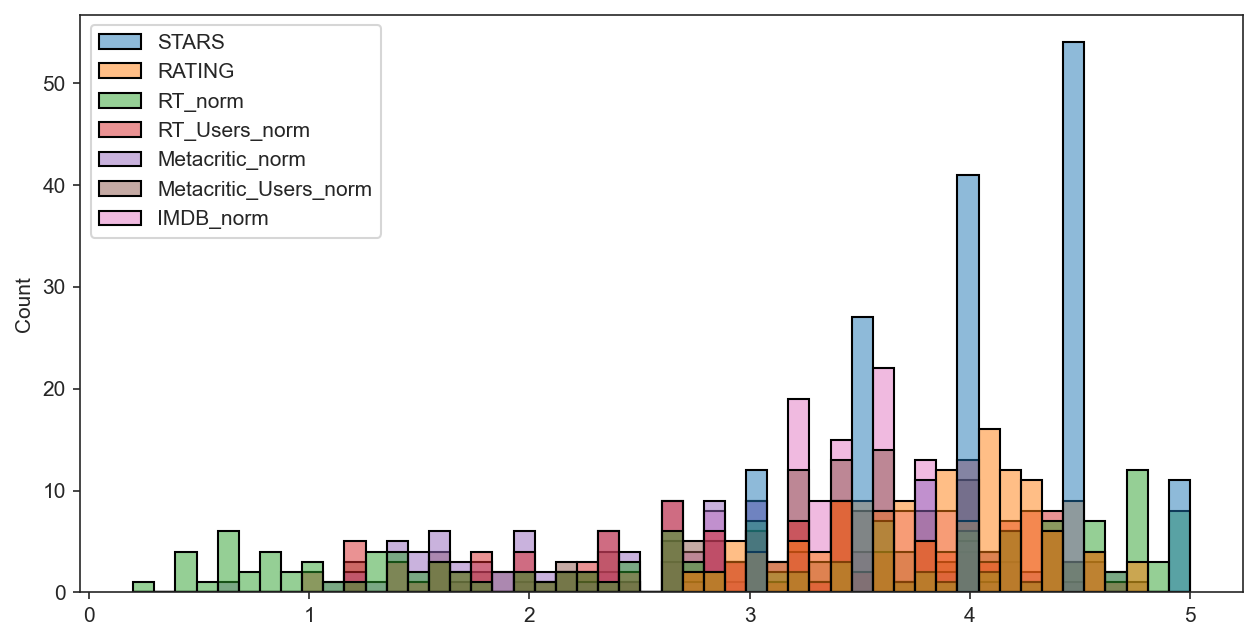

In [708]:
plt.subplots(figsize=(10,5), dpi=150)
sns.histplot(data=all_norm_rating, bins=50, edgecolor='black');

### How do different companies rate films with the lowest ratings?

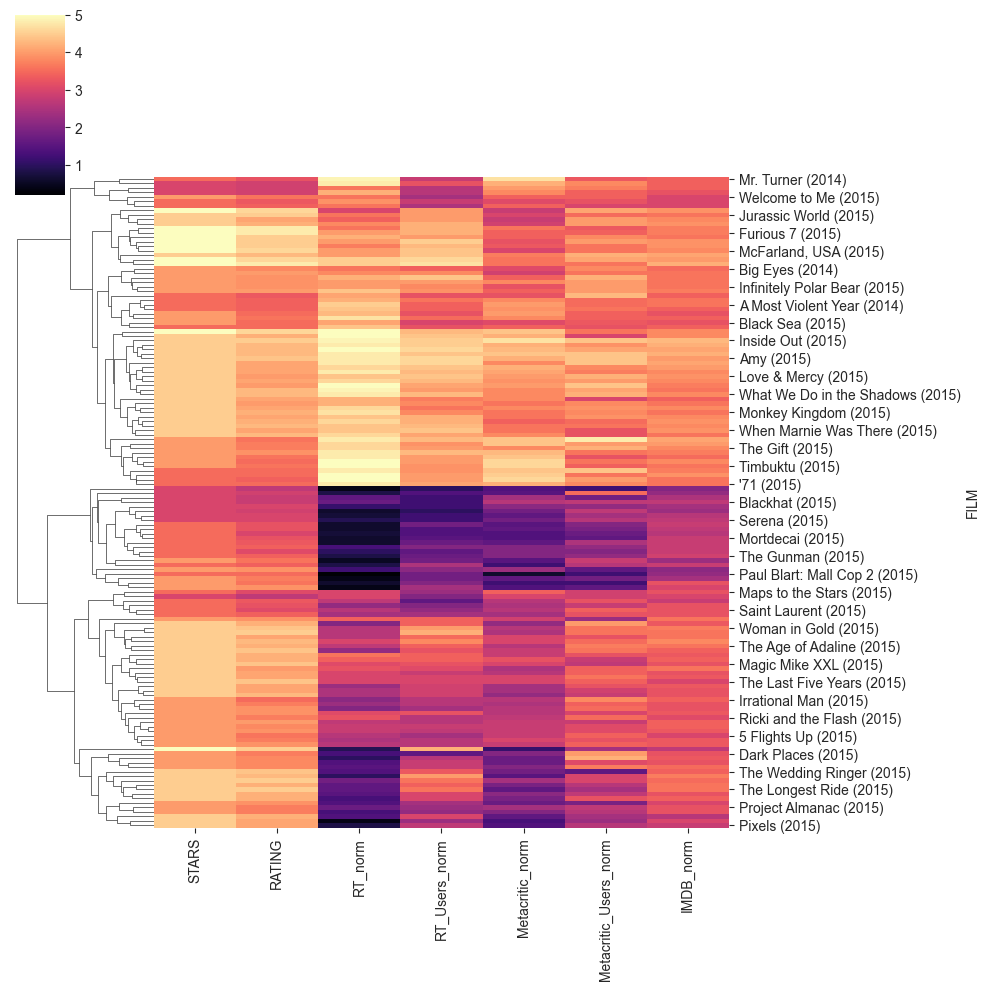

In [756]:
sns.clustermap(all_norm_rating,cmap='magma',col_cluster=False)

### Let's look at the 10 films with the worst ratings according to Rotten Tomatoes Critic - what are these 10 films? What normalized ratings did other companies give these films?

In [764]:
worst_films = all_norm_rating.nsmallest(10, columns='RT_norm')

Text(0.5, 0.98, 'TOP-10 worst films')

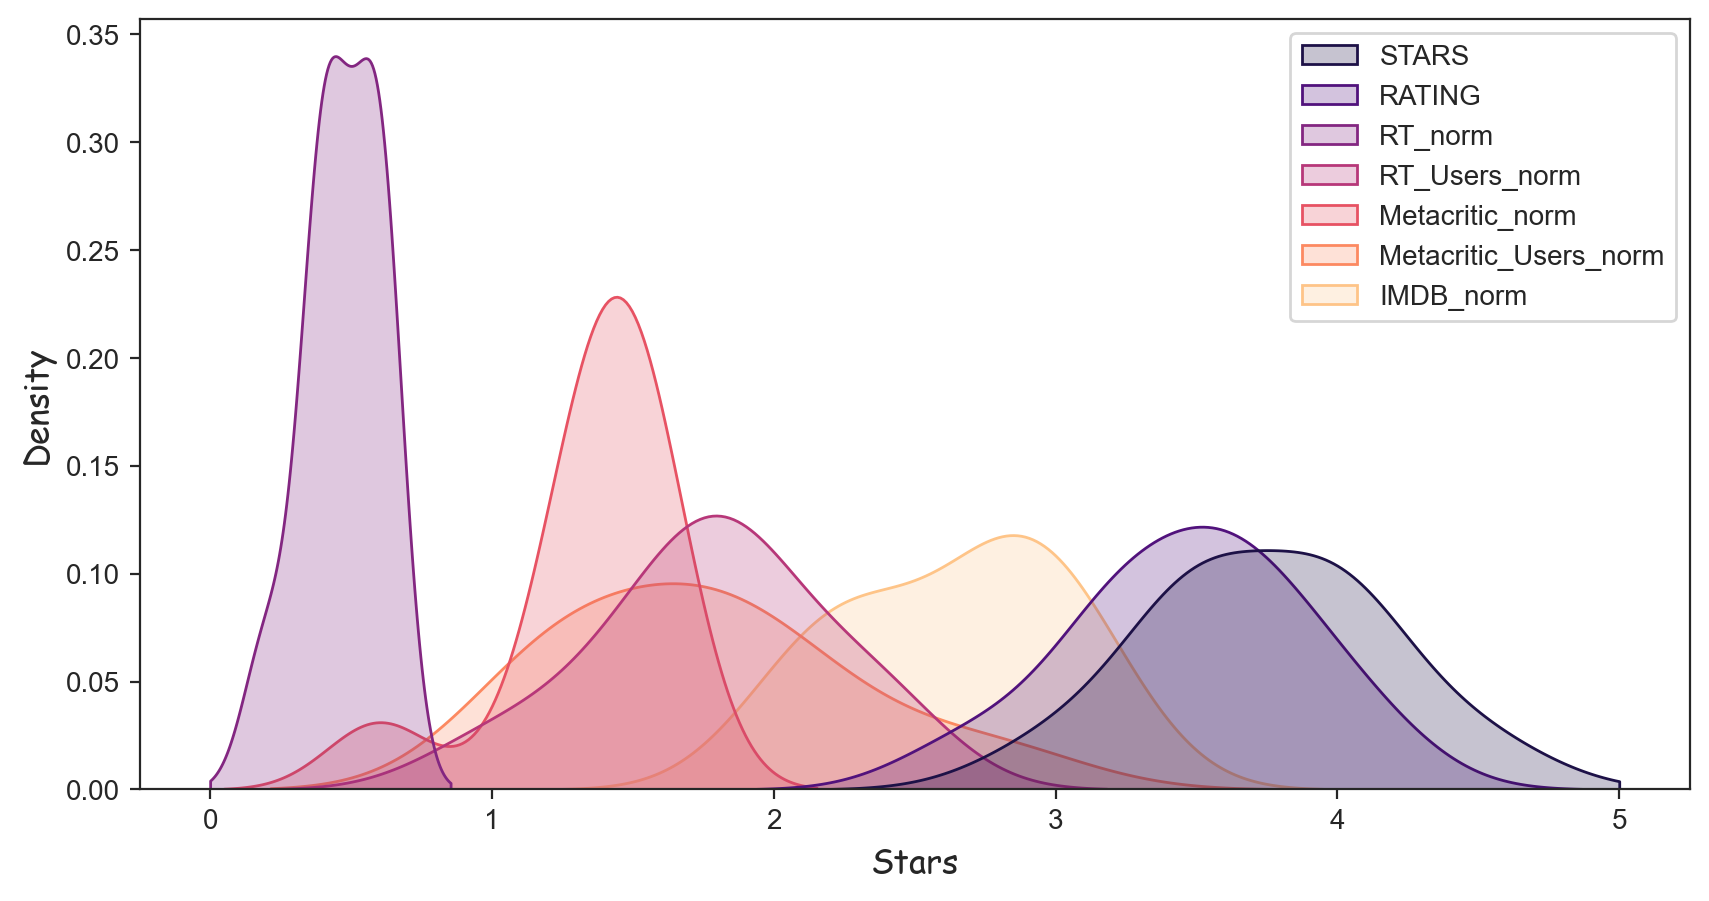

In [766]:
plt.figure(figsize=(10,5), dpi=200)
sns.kdeplot(data=worst_films,
            fill=True,
            palette='magma',
            clip=[0,5])

plt.xlabel(xlabel='Stars', fontdict={'size':12, 'family':'cursive'})
plt.ylabel(ylabel='Density', fontdict={'size':12, 'family':'cursive'})
fig.suptitle('TOP-10 worst films', fontdict={'size':14, 'family':'cursive'})